In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('bestsellers with categories.csv')

In [23]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [24]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values if any
df.dropna(inplace=True)  # Example: Dropping rows with missing values

# Convert data types if necessary (e.g., converting 'Year' to datetime)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Check unique values and handle any anomalies
print(df['Genre'].unique())


Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64
['Non Fiction' 'Fiction']


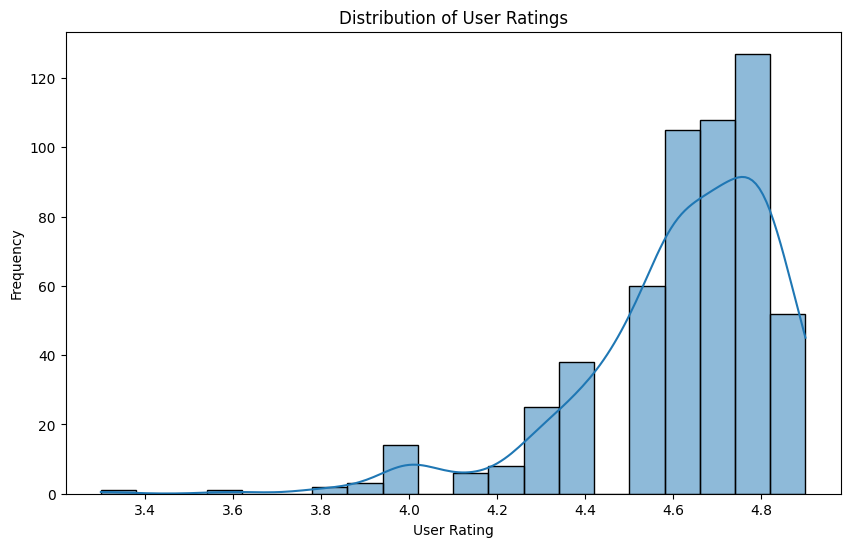

In [25]:
# Example: Plotting distribution of User ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['User Rating'], bins=20, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()


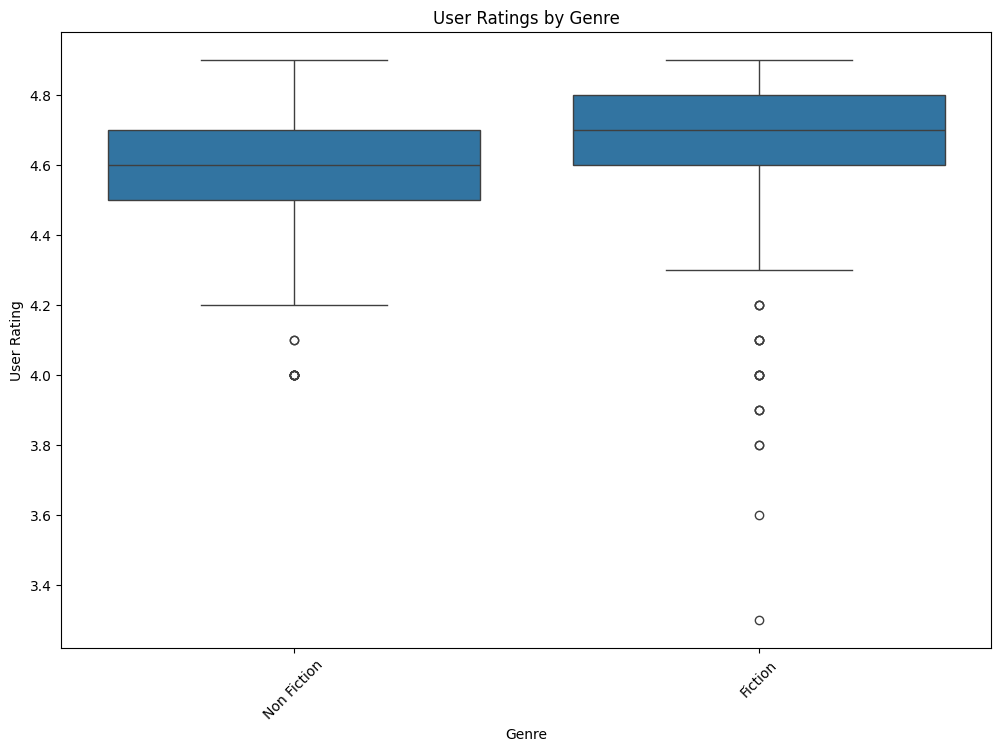

In [26]:
# Example: Comparing User ratings across different Genres
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='User Rating', data=df)
plt.title('User Ratings by Genre')
plt.xticks(rotation=45)
plt.show()


In [27]:
# Example: Summary statistics for numerical columns
print(df.describe())

# Example: Correlation analysis (if applicable)
# Make sure numerical columns are float or int type
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()


       User Rating       Reviews       Price                           Year
count   550.000000    550.000000  550.000000                            550
mean      4.618364  11953.281818   13.100000  2013-12-31 21:49:05.454545408
min       3.300000     37.000000    0.000000            2009-01-01 00:00:00
25%       4.500000   4058.000000    7.000000            2011-01-01 00:00:00
50%       4.700000   8580.000000   11.000000            2014-01-01 00:00:00
75%       4.800000  17253.250000   16.000000            2017-01-01 00:00:00
max       4.900000  87841.000000  105.000000            2019-01-01 00:00:00
std       0.226980  11731.132017   10.842262                            NaN


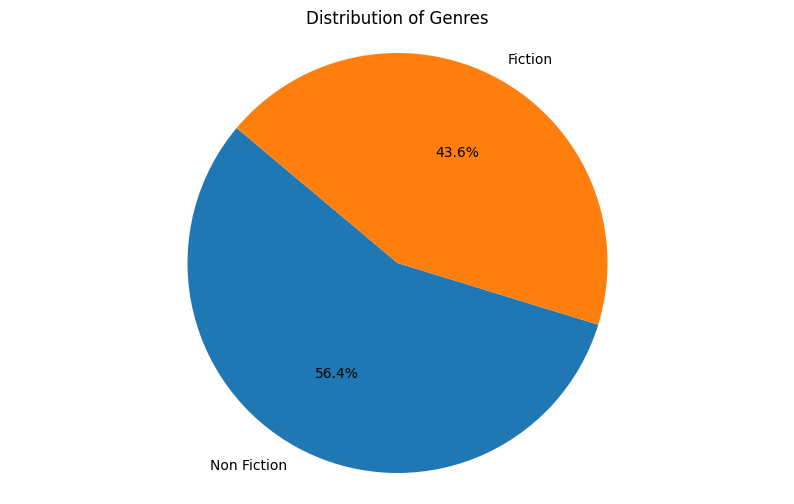

In [28]:
# Plotting the division of genres
plt.figure(figsize=(10, 6))
genre_counts = df['Genre'].value_counts()
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


C:\Users\abhir\AppData\Local\Temp\ipykernel_21860\130500424.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.values, y=author_counts.index, palette='viridis')


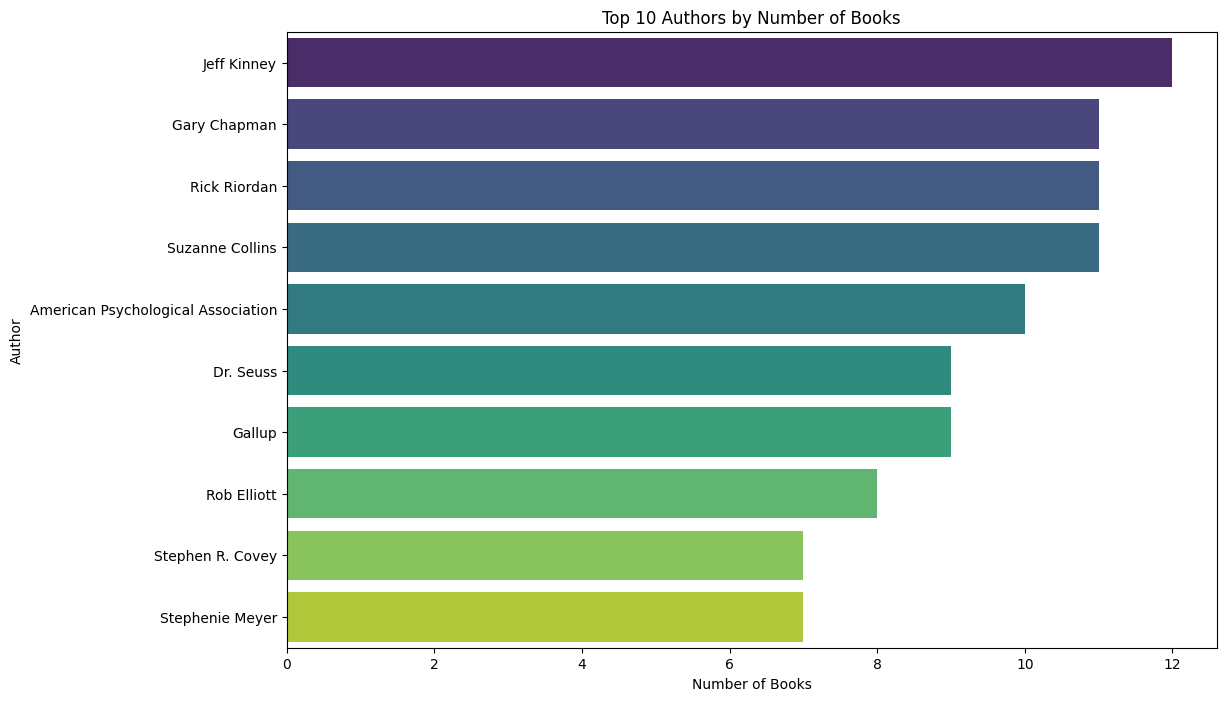

In [29]:
# Plotting the division of authors (top 10 authors by count)
plt.figure(figsize=(12, 8))
author_counts = df['Author'].value_counts().head(10)
sns.barplot(x=author_counts.values, y=author_counts.index, palette='viridis')
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()


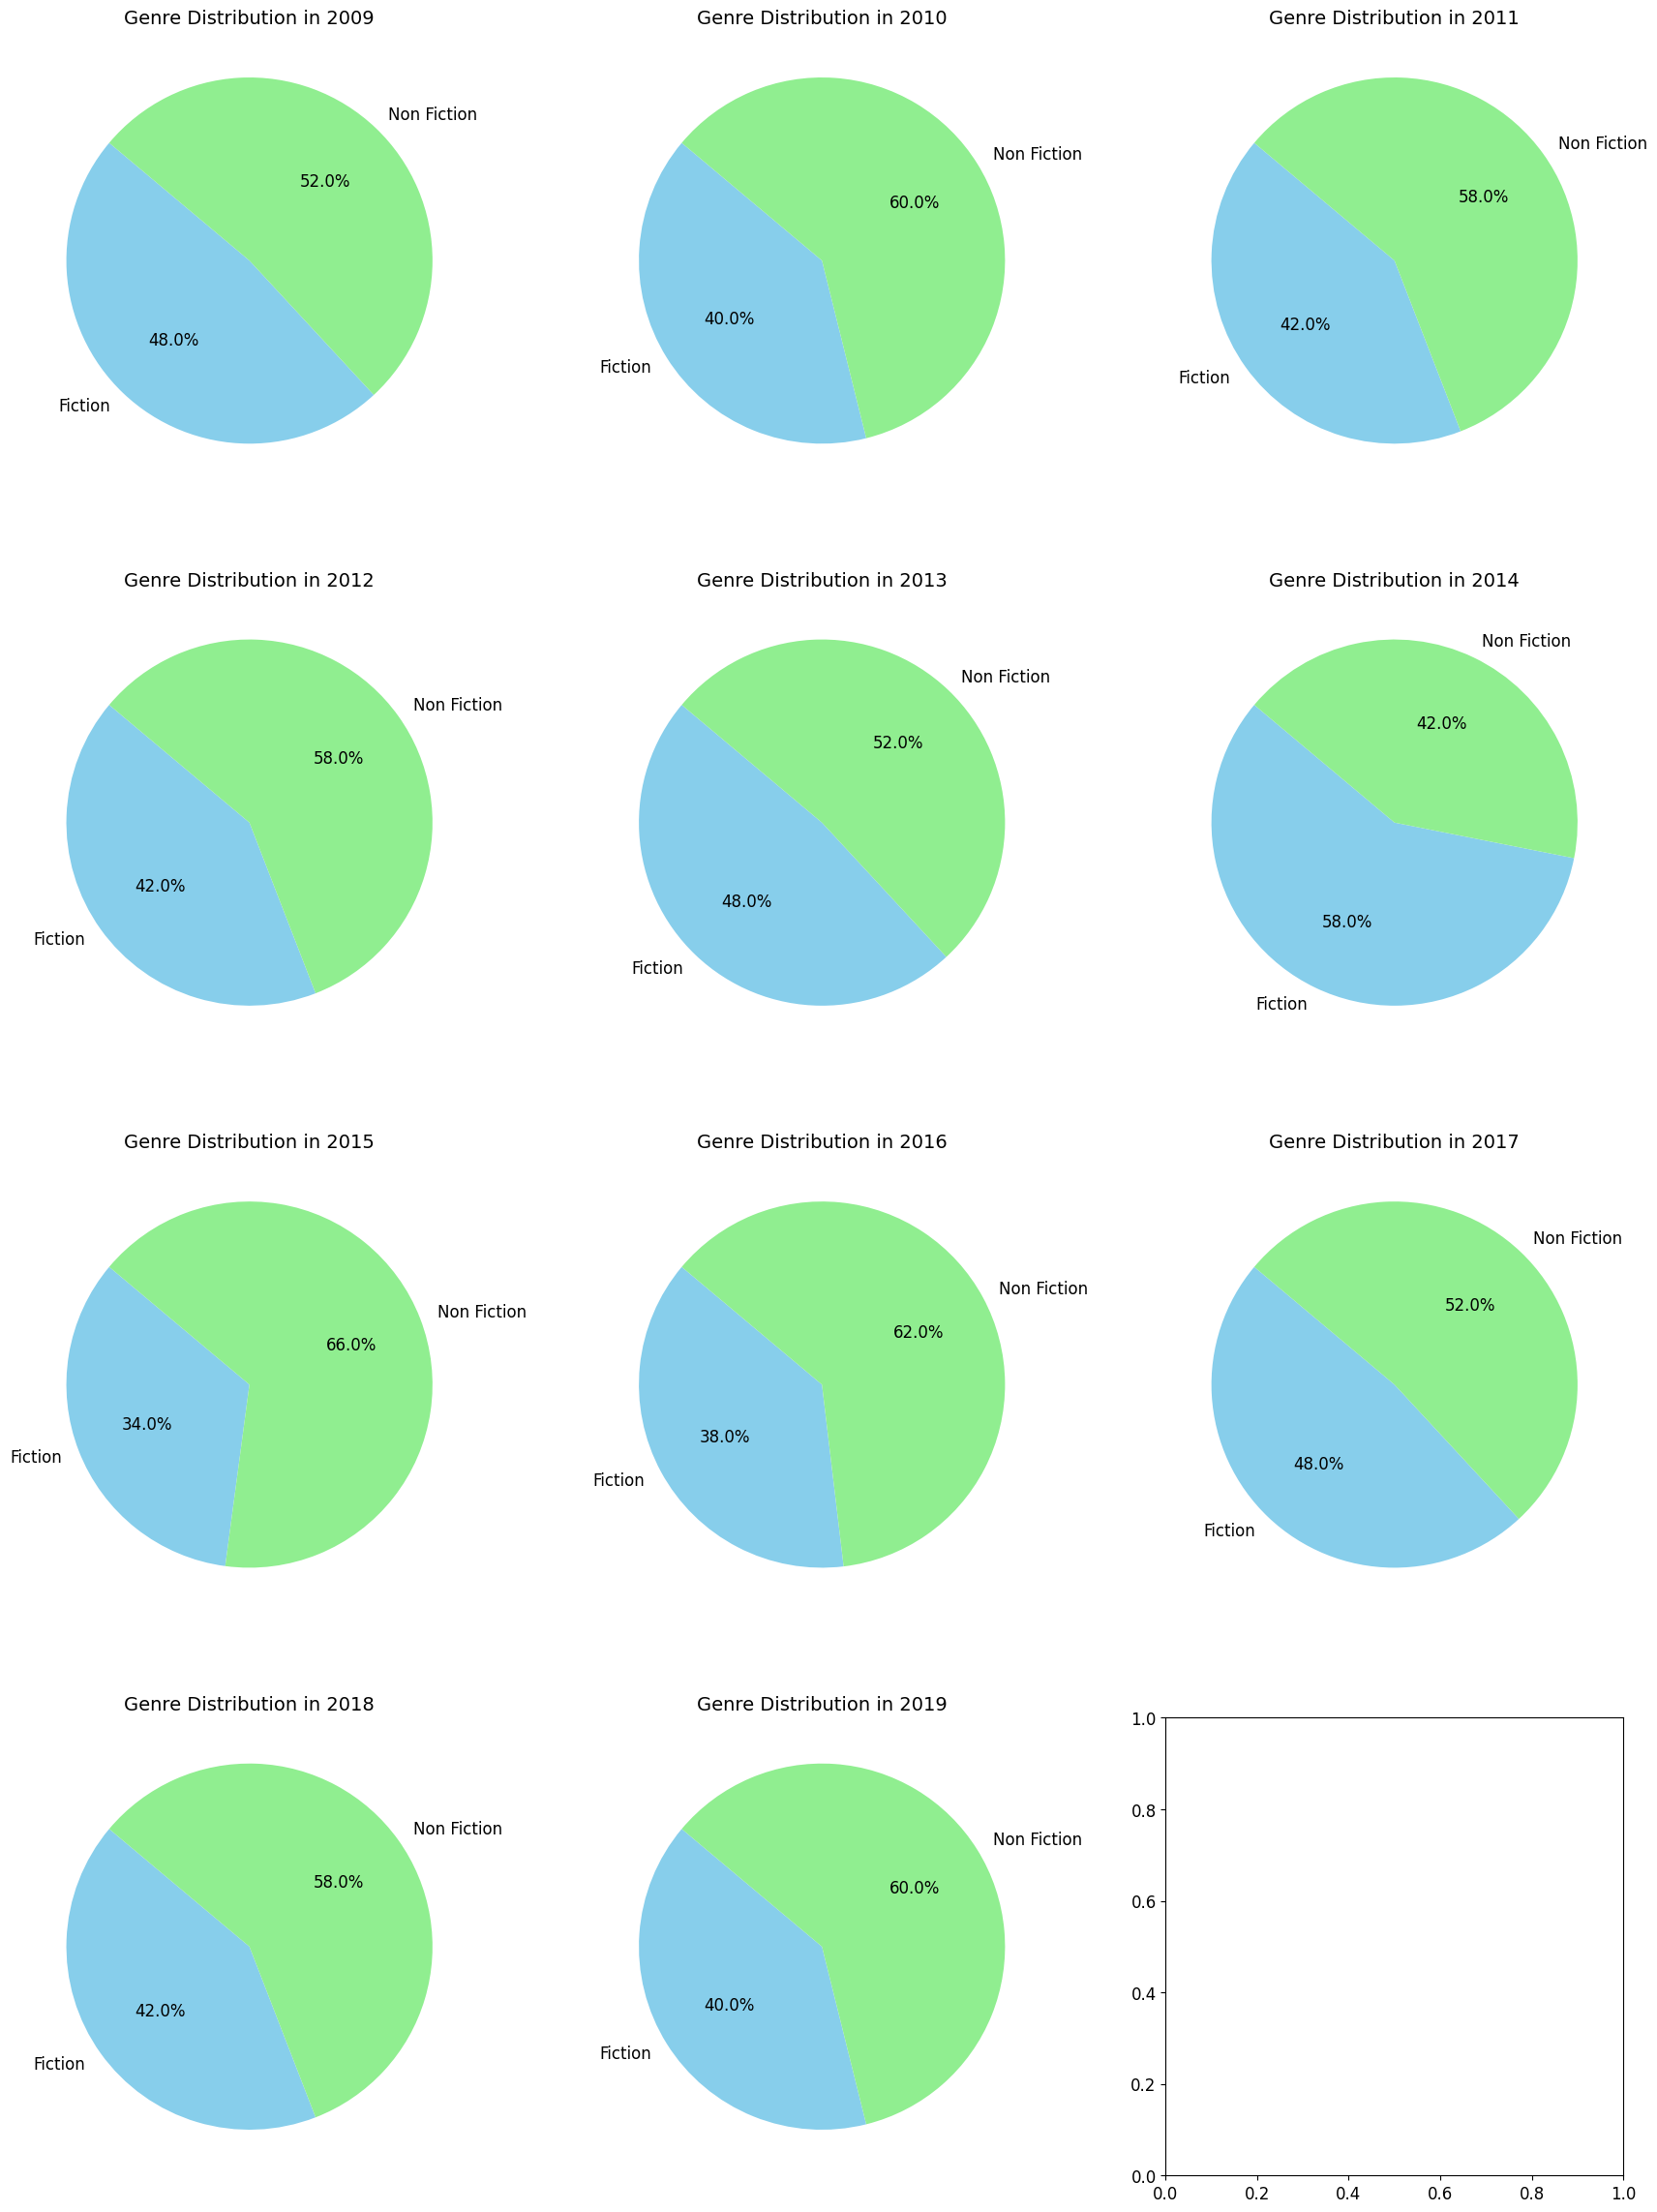

In [34]:



# Convert 'Year' to datetime format (if not already)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Group by Year and Genre, count occurrences
year_genre_counts = df.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

# Get years and genres
years = year_genre_counts.index
genres = year_genre_counts.columns

# Increase font size for pie chart text
plt.rc('font', size=12)  # Set default font size for Matplotlib

# Plotting multiple pie charts in a grid layout
num_years = len(years)
num_cols = 3  # Adjust the number of columns as per your preference
num_rows = (num_years + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(6 * num_cols, 6 * num_rows), subplot_kw=dict(aspect='equal'))

for i, year in enumerate(years):
    row = i // num_cols
    col = i % num_cols
    genre_counts = year_genre_counts.loc[year]
    axes[row, col].pie(genre_counts, labels=genres, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
    axes[row, col].set_title(f'Genre Distribution in {year.year}', fontsize=14)  # Increase title font size

# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()


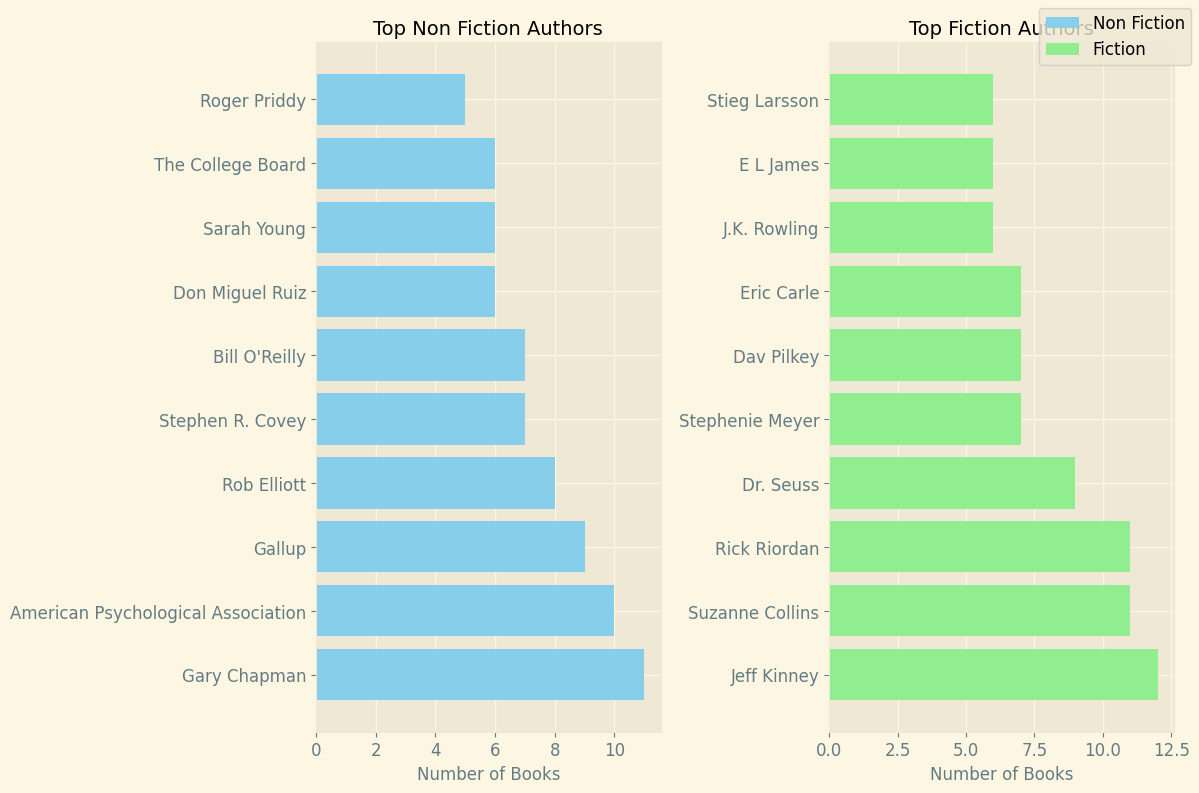

In [36]:
# Group by Author and Genre, count occurrences, and select top authors
best_nf_authors = df[df['Genre'] == 'Non Fiction'].groupby('Author').size().sort_values(ascending=False)[:10]
best_f_authors = df[df['Genre'] == 'Fiction'].groupby('Author').size().sort_values(ascending=False)[:10]

# Plotting with improved styling and layout
plt.style.use('Solarize_Light2')

fig, ax = plt.subplots(1, 2, figsize=(12, 8))

# Non Fiction Authors
ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values, color='skyblue')
ax[0].set_title('Top Non Fiction Authors', fontsize=14)
ax[0].set_xlabel('Number of Books')
ax[0].set_yticks(np.arange(len(best_nf_authors)))  # Set tick locations
ax[0].set_yticklabels(best_nf_authors.index, fontsize=12)  # Set tick labels

# Fiction Authors
ax[1].barh(y=best_f_authors.index, width=best_f_authors.values, color='lightgreen')
ax[1].set_title('Top Fiction Authors', fontsize=14)
ax[1].set_xlabel('Number of Books')
ax[1].set_yticks(np.arange(len(best_f_authors)))  # Set tick locations
ax[1].set_yticklabels(best_f_authors.index, fontsize=12)  # Set tick labels

# Add legend
fig.legend(['Non Fiction', 'Fiction'], loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()


C:\Users\abhir\AppData\Local\Temp\ipykernel_21860\2358451473.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(top_authors.index, fontsize=12, fontweight='semibold')


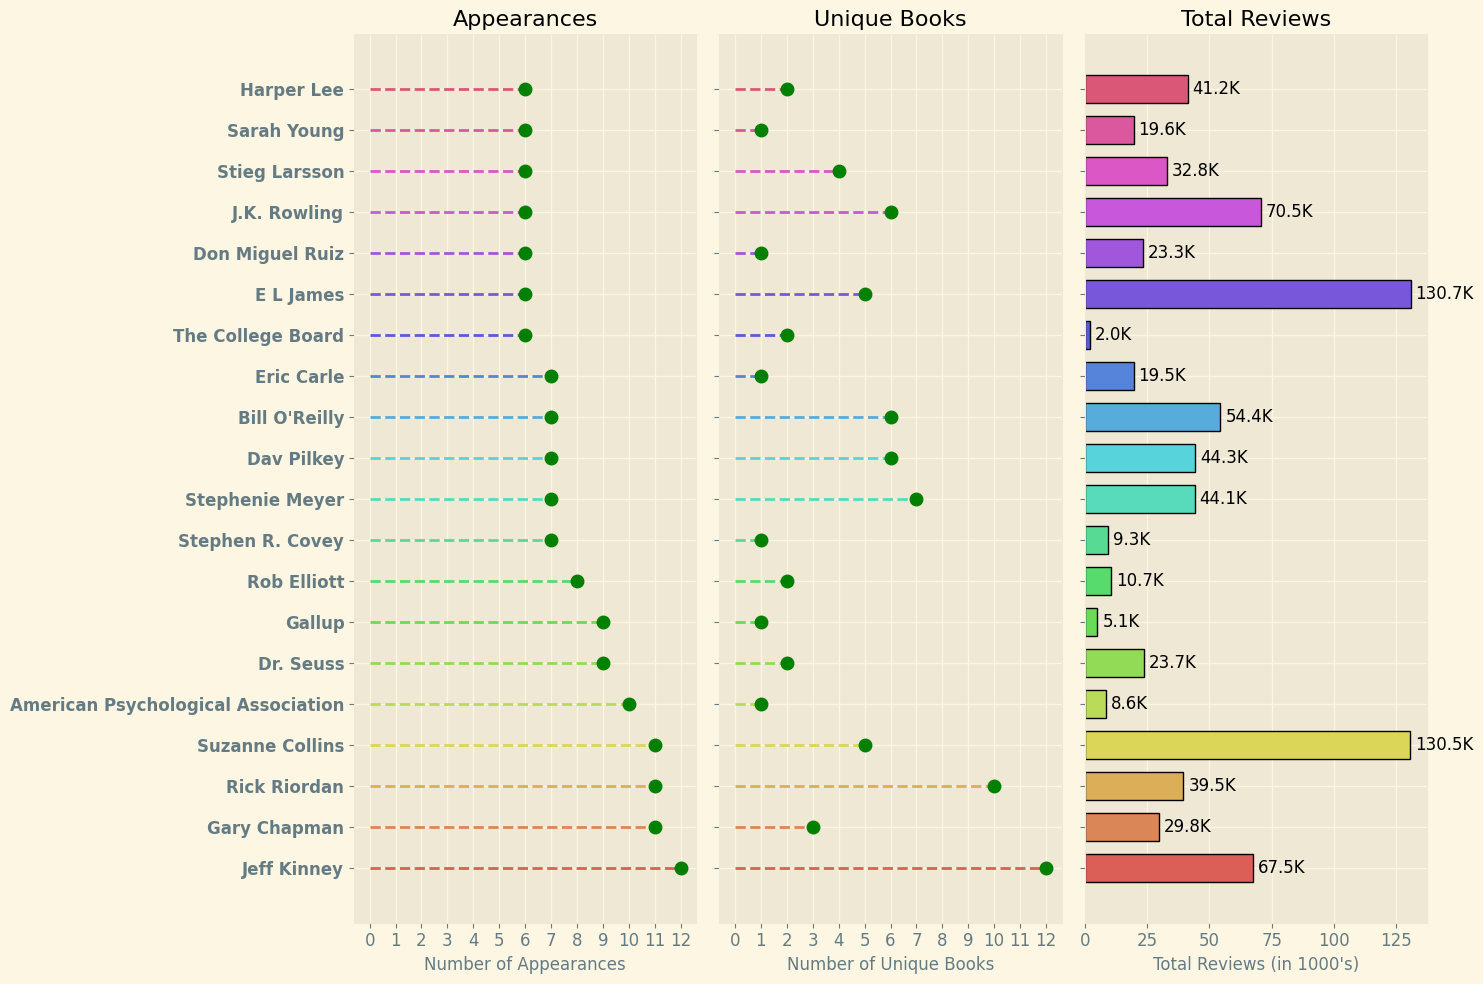

In [37]:


# Top 20 best-selling authors based on appearances
n_best = 20
top_authors = df['Author'].value_counts().nlargest(n_best)

# Remove duplicates based on book names
no_dup = df.drop_duplicates('Name')

# Initialize figure and axes
fig, ax = plt.subplots(1, 3, figsize=(15, 10), sharey=True)

# Color palette for visualization
color = sns.color_palette("hls", n_best)

# Subplot 1: Appearances
ax[0].hlines(y=top_authors.index, xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number of Appearances')
ax[0].set_xticks(np.arange(top_authors.values.max() + 1))
ax[0].set_yticklabels(top_authors.index, fontsize=12, fontweight='semibold')
ax[0].set_title('Appearances')

# Subplot 2: Unique Books
book_count = []
for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup['Author'] == name]['Name']))

ax[1].hlines(y=top_authors.index, xmin=0, xmax=book_count, color=color, linestyles='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of Unique Books')
ax[1].set_xticks(np.arange(max(book_count) + 1))
ax[1].set_title('Unique Books')

# Subplot 3: Total Reviews
total_reviews = []
for name, col in zip(top_authors.index, color):
    total_reviews.append(no_dup[no_dup['Author'] == name]['Reviews'].sum() / 1000)

ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)
for i, (name, val) in enumerate(zip(top_authors.index, total_reviews)):
    ax[2].text(val + 2, i, f'{val:.1f}K', va='center')
ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total Reviews')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


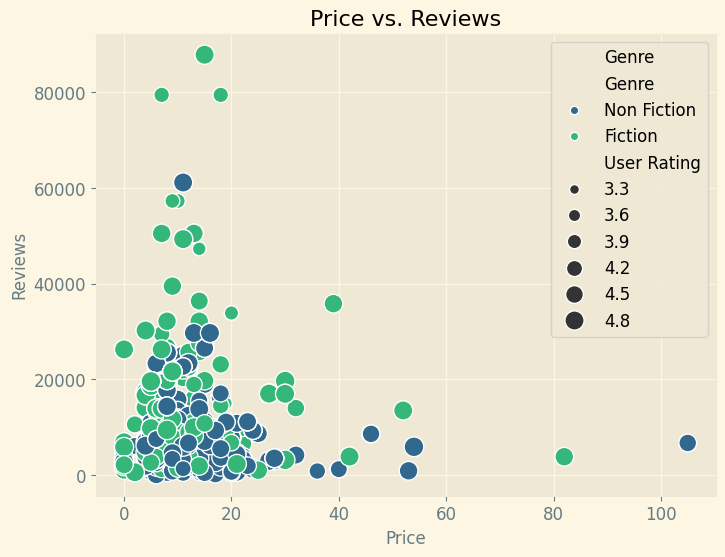

ValueError: Could not interpret value `User rating` for `size`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [42]:
# Scatter plot of Price vs. Reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Reviews', data=df, hue='Genre', palette='viridis', size='User Rating', sizes=(50, 200))
plt.title('Price vs. Reviews')
plt.xlabel('Price')
plt.ylabel('Reviews')
plt.legend(title='Genre')
plt.show()

# Scatter plot of Year vs. Reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Year', y='Reviews', data=df, hue='Genre', palette='viridis', size='User rating', sizes=(50, 200))
plt.title('Year vs. Reviews')
plt.xlabel('Year')
plt.ylabel('Reviews')
plt.legend(title='Genre')
plt.show()


C:\Users\abhir\AppData\Local\Temp\ipykernel_21860\3758468550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='User Rating', data=df, palette='pastel')


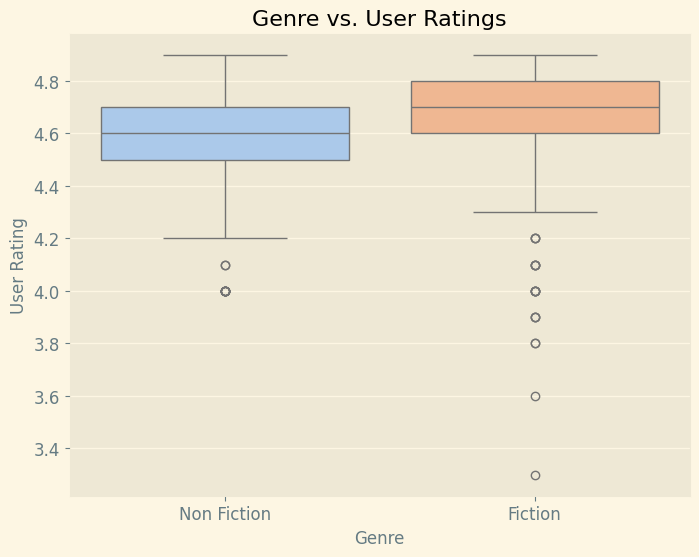

C:\Users\abhir\AppData\Local\Temp\ipykernel_21860\3758468550.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Author', y='Reviews', data=df[df['Author'].isin(top_authors.index)], palette='pastel')


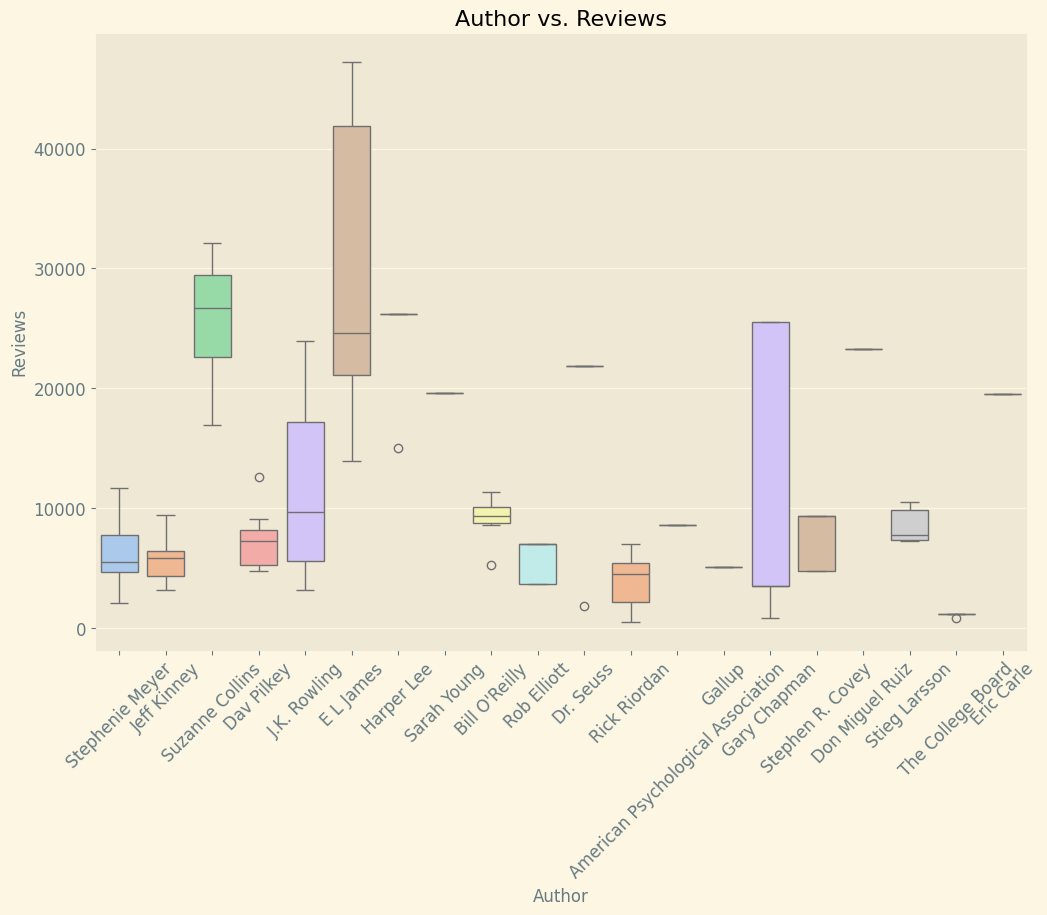

In [44]:
# Box plot of Genre vs. User Ratings
plt.figure(figsize=(8, 6))
sns.boxplot(x='Genre', y='User Rating', data=df, palette='pastel')
plt.title('Genre vs. User Ratings')
plt.xlabel('Genre')
plt.ylabel('User Rating')
plt.show()

# Box plot of Author vs. Reviews (example assuming top authors already defined)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Author', y='Reviews', data=df[df['Author'].isin(top_authors.index)], palette='pastel')
plt.title('Author vs. Reviews')
plt.xlabel('Author')
plt.ylabel('Reviews')
plt.xticks(rotation=45)
plt.show()


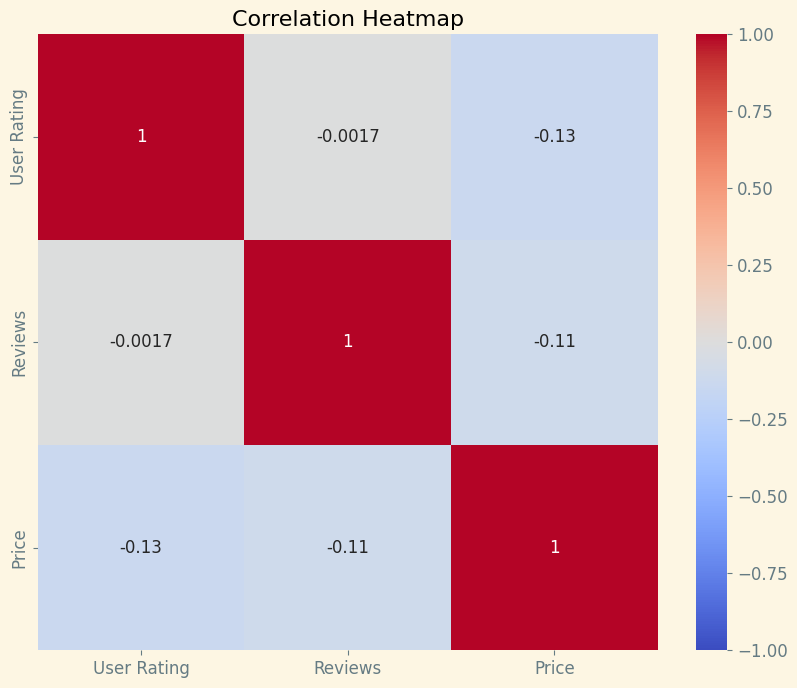

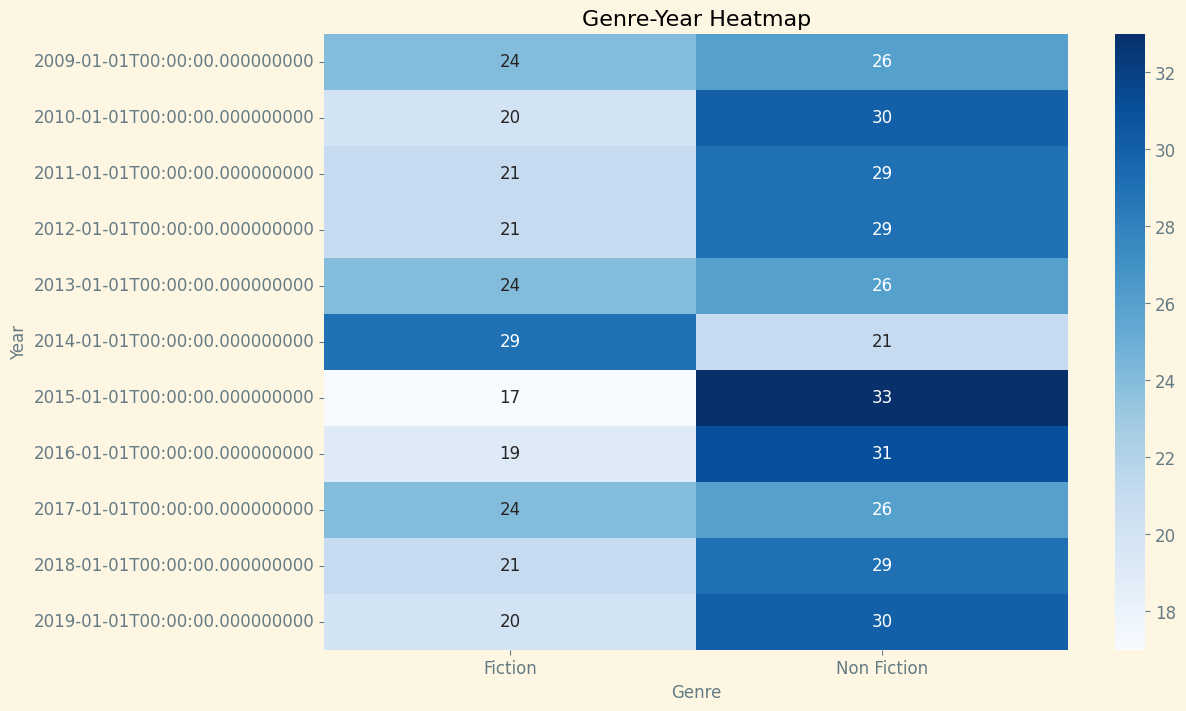

In [49]:
# Create Correlation Heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Create Genre-Year Heatmap
genre_year_counts = df.groupby(['Year', 'Genre']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(genre_year_counts, cmap='Blues', annot=True, fmt='g')
plt.title('Genre-Year Heatmap')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.show()
